# Importing Libraries

In [1]:
%cd ..

/Users/yuanqi/Desktop/DSA4262-ACMXZ


In [57]:
import pandas as pd
import numpy as np
import os

#from util.model import (modelling)

# Loading Data

### Loading parquets

In [74]:
X_train_path = "../data/preprocessed_data/training/X_train_enc.parquet" ## to edit file path
X_train = pd.read_parquet(X_train_path)

y_train_path = "../data/preprocessed_data/training/y_train.parquet"
y_train = pd.read_parquet(y_train_path)
y_train = pd.DataFrame(y_train['label'].astype(int))

In [61]:
## Load in Test Set
#X_test_path = "../data/preprocessed_data/test/X_test_enc.parquet"
X_test_path = "../data/preprocessed_data/test/X_test_enc.parquet"
X_test = pd.read_parquet(X_test_path)

y_test_path = "../data/preprocessed_data/test/y_test.parquet"
y_test = pd.read_parquet(y_test_path)
y_test = pd.DataFrame(y_test['label'].astype(int)) ## convert labels to int for roc and auc calculation

## Load in Validation Set
X_val_path = "../data/preprocessed_data/validation/X_val_enc.parquet"
X_val = pd.read_parquet(X_val_path)

y_val_path = "../data/preprocessed_data/validation/y_val.parquet"
y_val = pd.read_parquet(y_val_path)
y_val = pd.DataFrame(y_val['label'].astype(int))

# Modelling

In [70]:
#df_model = Modelling(X_train, y_train, X_val, y_val, df_val)
df_model = Modelling(X_train, y_train.values.ravel(), X_test_1, y_test.values.ravel(), df_val_mean)

In [ ]:
df_model.modelling_lightgbm()

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=3,
               min_child_weight=8.0, n_estimators=165, num_leaves=48,
               random_state=42, reg_alpha=1.3, reg_lambda=1.425462163056115,
               scale_pos_weight=5, verbosity=1)
model.fit(X_train_25,y_train.values.ravel(),eval_set=[(X_test_25,y_test.values.ravel()),(X_train_25,y_train.values.ravel())],eval_metric='logloss')

In [100]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test_1,y_test)))

Training accuracy 0.8146
Testing accuracy 0.9362


## Using Claudia's Function

re-tune lightgbm model using the selected features from PCA and RFE

In [62]:
import pandas as pd
import numpy as mp
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, auc
import statsmodels.api as sm
import matplotlib.pyplot as plt

import lightgbm as lgb

In [90]:
def lgbmodel(x_train, y_train, x_val, y_val, x_test, y_test, variable):
    
    ## fit lgbm classifier on training data
    # model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=3,
    #            min_child_weight=8.0, n_estimators=165, num_leaves=48,
    #            random_state=42, reg_alpha=1.3, reg_lambda=1.425462163056115,
            #    scale_pos_weight=5, verbosity=1)

    model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=18,
               min_child_weight=10.0, n_estimators=135, num_leaves=185,
               random_state=42, reg_alpha=0.1, reg_lambda=3,
               scale_pos_weight=2, verbosity=1, min_data_in_leaf = 20, lambda_l2 = 1, lambda_l1 = 0)
           
    #model.fit(x_train, y_train)
    model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],eval_metric='logloss')

    ## predicting validation set result and calculating accuracy
    y_val_pred = model.predict(x_val)
    print('Accuracy of logistic regression classifier on validation set using {}: {:.2f}'.format(variable, model.score(x_val, y_val)))

    ## predicting test set result and calculating accuracy
    y_test_pred = model.predict(x_test)
    print('Accuracy of logistic regression classifier on test set using {}: {:.2f}'.format(variable, model.score(x_test, y_test)))

    ## define metrics for roc
    y_test_pred_proba = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    mlp_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    # fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba, pos_label=1)
    print('auc: ', auc(fpr, tpr))   
    # calculate the precision-recall auc
    precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
    auc_score = auc(recall, precision)
    print('PR AUC: %.3f' % auc_score)
    
    ## create roc curve   
    plt.rcParams["figure.figsize"] = (8,6)
    plt.figure()
    plt.plot(fpr, tpr, label = 'LightGBoost (area = %0.2f)' % mlp_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()

    print(model.feature_importances_)

In [78]:
## function for basic classification
def lgbmodel(x_train, y_train, x_val, y_val, x_test, y_test, variable):
    ## create classifier
    # model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=12,
    #            min_child_weight=8.0, n_estimators=125, num_leaves=150,
    #            random_state=42, reg_alpha=1.5, reg_lambda=2,
    #            scale_pos_weight=5, verbosity=1, min_data_in_leaf=25,lambda_l2=0, lambda_l1 = 1.5)
    # model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=3,
    #            min_child_weight=8.0, n_estimators=165, num_leaves=48,
    #            random_state=42, reg_alpha=1.3, reg_lambda=1.425462163056115,
    #            scale_pos_weight=5, verbosity=1)
    # model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=21,
    #            min_child_weight=10.0, n_estimators=100, num_leaves=90,
    #            random_state=42, reg_alpha=1.5, reg_lambda=1.5,
    #            scale_pos_weight=2, verbosity=1, min_data_in_leaf=30,lambda_l2=0, lambda_l1 = 0.5)

    model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=12,
               min_child_weight=4.0, n_estimators=135, num_leaves=50,
               random_state=42, reg_alpha=1.5, reg_lambda=1.5,
               scale_pos_weight=2, verbosity=1, min_data_in_leaf=10,lambda_l2=1, lambda_l1 = 0)

    # {'scale_pos_weight': 2, 'reg_lambda': 1.5, 'reg_alpha': 1.5, 'num_leaves': 50, 
    # 'n_estimators': 135, 'min_data_in_leaf': 10, 'min_child_weight': 4.0, 'max_depth': 12, 'lambda_l2': 1, 'lambda_l1': 0}
               
    #model.fit(x_train, y_train)
    model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],eval_metric='logloss')

    ## get validation and test predicition
    y_val_pred = model.predict(x_val)
    print('Accuracy of random forest classifier on validation set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_val, y_val_pred)))
   
    y_test_pred = model.predict(x_test)
    print('Accuracy of random forest classifier on test set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_test, y_test_pred)))

    ## define metrics for roc
    y_test_pred_proba = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    rf_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    
    ## create roc curve  
    plt.rcParams["figure.figsize"] = (4,3)
 
    plt.figure()
    plt.plot(fpr, tpr, label = 'LightGBM Classifier (area = %0.2f)' % rf_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()

    ## define metric for precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
    auc_precision_recall = auc(recall, precision)

    ## create pr curve   
    plt.figure()
    plt.plot(recall, precision, label = 'LightGBM Classifier (area = %0.2f)' % auc_precision_recall)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall')
    plt.legend(loc = "lower right")
    plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=3 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14054
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 72
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=3 will be ignored. Current value: lambda_l2=1

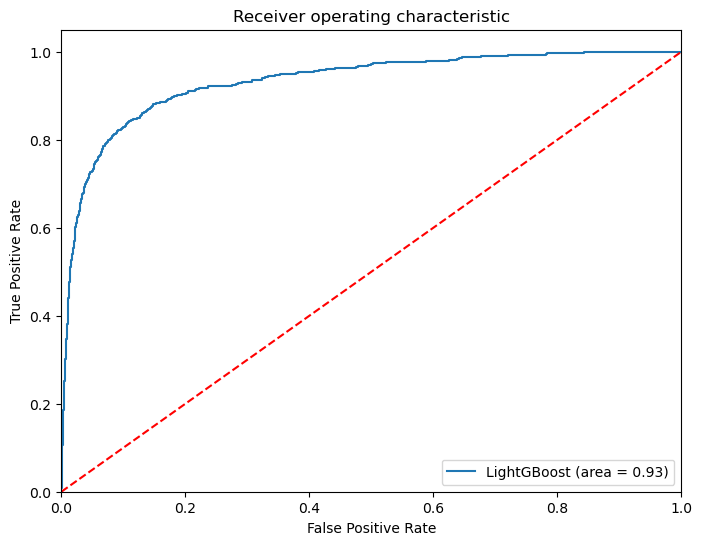

[387 304 289 300 248 189 312 302 186 333 202 372 358 210 154 140 171 253
 219 332 291 276 262 178 345 432 248 314 332 396 364 468 212 179 269 402
 209 294 274 263 275 147 339 289 252 281 191 450 317 478 197 357 175 438
 415 565  11   9  44  44  15   7   0   8   0  17  27  70  66  40  78  31]


In [91]:
lgbmodel(X_train, y_train.values.ravel(), X_val, y_val.values.ravel(), X_test, y_test.values.ravel(), "25th quantile")

## Hyperparameter Tuning

In [13]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
param_grid = {
    'num_leaves': [31, 50, 60, 90, 127, 150, 175, 185, 190, 200, 225],
    'reg_alpha': [0.1, 0.5, 1, 1.5, 2, 2.5],
    'min_data_in_leaf': [10,15, 20, 25, 30],
    'lambda_l1': [0,0.5,1,1.5, 2, 2.5, 3],
    'lambda_l2': [0,0.5,1],
    'reg_lambda':[0.5,1,1.5,1.75,2, 2.25, 2.5, 3],
    'n_estimators': [100,110, 115, 120 ,125,130,135, 140, 145,150,165,175],
    'max_depth':[3,6,9,12, 15,18,21,24],
    'min_child_weight':[4.0, 8.0, 10.0, 12.0, 12.5, 15.0],
    'scale_pos_weight':[2,5,7,9,11,13,15]
    }

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='auc')

gsearch = RandomizedSearchCV(lgb_estimator, param_grid, cv=3, n_jobs=3)
lgb_model = gsearch.fit(X=X_train, y=y_train.values.ravel())

print(lgb_model.best_params_, lgb_model.best_score_)

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=1.5 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=2.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=1.5 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=2.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=2 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=2.5 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=2 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=2.5 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=2 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=2.5 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.5 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=1.5 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.5 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=1.5 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.5 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=1.5 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=3 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=3 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.1 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=3 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=1 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=1 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.5, reg_lambda=1 will be ignored. Current value: lambda_l2=0.5


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.5 will be ignored. Current value: lambda_l2=0


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.5 will be ignored. Current value: lambda_l2=0


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.5 will be ignored. Current value: lambda_l2=0


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=3 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=3 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=3 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=1 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=2.5 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=1 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=2.5 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=1 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=2.5 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=2.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.5 will be ignored. Current value: lambda_l2=0


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=2.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.5 will be ignored. Current value: lambda_l2=0


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=2.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=2.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=1.5 will be ignored. Current value: lambda_l2=0


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.75 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.75 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.75 will be ignored. Current value: lambda_l2=1


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=3 will be ignored. Current value: lambda_l2=1
{'scale_pos_weight': 2, 'reg_lambda': 3, 'reg_alpha': 0.1, 'num_leaves': 185, 'n_estimators': 135, 'min_data_in_leaf': 20, 'min_child_weight': 10.0, 'max_depth': 18, 'lambda_l2': 1, 'lambda_l1': 0} 0.9113004983888252


### Dropping of columns

In [80]:
cols_to_drop = ['mean_-1_25', 'mean_-1_50', 'mean_-1_75', 'mean_-1_mean','mean_-1_min', 'mean_-1_max',
                'mean_0_25', 'mean_0_50', 'mean_0_75', 'mean_0_mean','mean_0_min', 'mean_0_max',
                'mean_+1_25', 'mean_+1_50', 'mean_+1_75', 'mean_+1_mean','mean_+1_min', 'mean_+1_max']
X_train_d = X_train.drop(cols_to_drop, axis = 1)
X_val_d = X_val.drop(cols_to_drop, axis = 1)
X_test_d = X_test.drop(cols_to_drop, axis = 1)

In [77]:
X_train_d

,reads_count,dwelling_time_-1_25,dwelling_time_-1_50,dwelling_time_-1_75,dwelling_time_-1_mean,dwelling_time_-1_min,dwelling_time_-1_max,std_-1_25,std_-1_50,std_-1_75,...,position_1_T,position_2_A,position_2_G,position_5_C,position_5_A,position_5_T,position_6_T,position_6_A,position_6_G,position_6_C
0,-0.429603,-0.097196,-0.491042,-0.681852,-0.757836,0.023085,-1.355167,-0.625580,-0.777883,-0.816721,...,0,1,0,1,0,0,1,0,0,0
1,-0.350251,-0.667241,-0.836892,-0.576006,-0.738994,0.023085,-0.981329,-0.912831,-0.745608,-0.591965,...,0,0,1,1,0,0,1,0,0,0
2,-0.494527,-1.646377,-1.552442,-1.727199,-1.942534,0.023085,-1.577449,-1.089840,-0.969047,-0.850329,...,1,1,0,0,1,0,0,1,0,0
3,-0.335823,-0.162025,-0.562597,-0.773584,-0.674330,1.436755,0.362466,-0.422175,-0.452655,-0.560457,...,1,0,1,0,1,0,1,0,0,0
4,-0.494527,-1.498836,-1.170815,-1.628410,-1.661636,-0.673200,-1.183403,-1.217162,-0.929325,-0.953254,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30401,0.219641,0.470179,0.772986,0.867393,0.872813,0.145475,0.404605,0.540573,0.480885,0.369271,...,0,0,1,0,0,1,0,0,0,1
30402,-0.487313,2.284990,1.788111,1.441200,1.842226,1.584522,-0.218663,0.821727,0.901437,0.788863,...,0,0,1,1,0,0,0,1,0,0
30403,-0.458458,1.235525,0.380691,0.320119,0.494436,1.955841,-0.194858,-0.721332,-0.810700,-0.864526,...,0,0,1,0,0,1,0,0,1,0
30404,0.024868,-0.458141,-0.088997,0.212745,0.014388,-1.212709,0.757649,2.440285,2.763417,3.023251,...,0,1,0,0,1,0,1,0,0,0


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9721
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

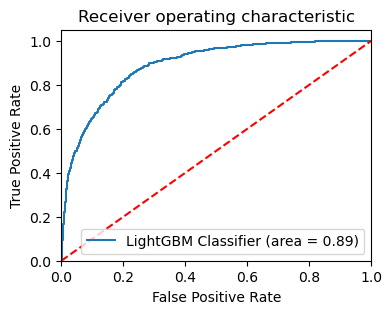

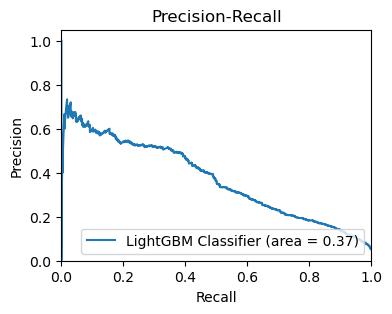

In [81]:
lgbmodel(X_train_d, y_train.values.ravel(), X_val_d, y_val.values.ravel(), X_test_d, y_test.values.ravel(), "25th quantile")

In [ ]:
param_grid = {
    'num_leaves': [31, 50, 60, 90, 127, 150, 175, 185, 190, 200, 225],
    'reg_alpha': [0.1, 0.5, 1, 1.5, 2, 2.5],
    'min_data_in_leaf': [10,15, 20, 25, 30],
    'lambda_l1': [0,0.5,1,1.5, 2, 2.5, 3],
    'lambda_l2': [0,0.5,1],
    'reg_lambda':[0.5,1,1.5,1.75,2, 2.25, 2.5, 3],
    'n_estimators': [100,110, 115, 120 ,125,130,135, 140, 145,150,165,175],
    'max_depth':[3,6,9,12, 15,18,21,24],
    'min_child_weight':[4.0, 8.0, 10.0, 12.0, 12.5, 15.0],
    'scale_pos_weight':[2,5,7,9,11,13,15]
    }

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='auc')

gsearch = RandomizedSearchCV(lgb_estimator, param_grid, cv=3, n_jobs=3)
lgb_model = gsearch.fit(X=X_train, y=y_train.values.ravel())

print(lgb_model.best_params_, lgb_model.best_score_)

## RFE

In [82]:
# Feature importance

#lightGBM model fit

model = lgb.LGBMClassifier(learning_rate=0.14048611339776612, max_depth=12,
               min_child_weight=4.0, n_estimators=135, num_leaves=50,
               random_state=42, reg_alpha=1.5, reg_lambda=1.5,
               scale_pos_weight=2, verbosity=1, min_data_in_leaf=10,lambda_l2=1, lambda_l1 = 0)
model.fit(X_train, y_train)
model.booster_.feature_importance()

# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':X_train.columns, 'fea_imp':model.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14054
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

,cols,fea_imp
31,mean_0_25,265
55,relative_position,214
49,mean_+1_25,201
25,std_0_25,200
53,mean_+1_min,174
...,...,...
60,position_1_A,6
57,position_0_G,5
61,position_1_G,5
63,position_2_A,5


In [83]:
fea_imp_.loc[fea_imp_.fea_imp > 114].sort_values(by=['fea_imp'], ascending = False)

,cols,fea_imp
31,mean_0_25,265
55,relative_position,214
49,mean_+1_25,201
25,std_0_25,200
53,mean_+1_min,174
35,mean_0_min,170
54,mean_+1_max,165
29,std_0_min,163
0,reads_count,154
28,std_0_mean,152


In [25]:
len(X_train.columns)

65

In [84]:
#Recursive Feature Elimination(RFE)
from sklearn.feature_selection import RFE

# create the RFE model and select 10 attributes
rfe = RFE(model,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print(rfe.support_)

# summarize the ranking of the attributes
fea_rank_ = pd.DataFrame({'cols':X_train.columns, 'fea_rank':rfe.ranking_})
fea_rank_.loc[fea_rank_.fea_rank > 0].sort_values(by=['fea_rank'], ascending = True)


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14054
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14052
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14050
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14048
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14046
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14044
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14042
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14040
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009951 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14038
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14036
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14034
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14032
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14030
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14028
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14026
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14024
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14022
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13789
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13534
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13279
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13024
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180326 -> initscore=-1.514139
[LightGBM] [Info] Start training from score -1.514139


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12769
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12515
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12260
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180326 -> initscore=-1.514139
[LightGBM] [Info] Start training from score -1.514139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_d

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12029
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.180326 -> initscore=-1.514139
[LightGBM] [Info] Start training from score -1.514139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11774
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11519
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11264
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11033
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10778
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10523
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10268
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10013
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9758
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9503
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9248
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8993
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8738
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8518
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8287
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8032
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7777
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005748 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7541
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7316
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7061
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6806
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6551
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6296
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5786
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5531
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5276
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5021
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4766
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4511
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4286
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4031
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was exp

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3544
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3291
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3036
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2781
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/gene/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2526
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features:

,cols,fea_rank
0,reads_count,1
53,mean_+1_min,1
51,mean_+1_75,1
49,mean_+1_25,1
45,std_+1_75,1
...,...,...
63,position_2_A,59
56,position_0_C,60
57,position_0_G,61
62,position_1_T,62


In [85]:
top_few_fe = fea_rank_.loc[fea_rank_.fea_rank < 20].sort_values(by=['fea_rank'], ascending = True)['cols'].unique()
X_train_fe = X_train[top_few_fe]
X_val_fe = X_val[top_few_fe]
X_test_fe = X_test[top_few_fe]

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7061
[LightGBM] [Info] Number 

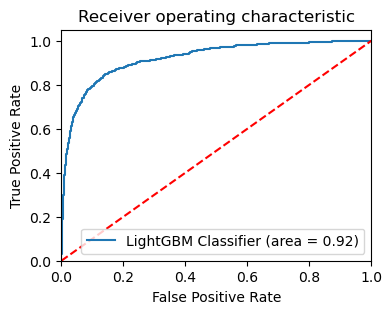

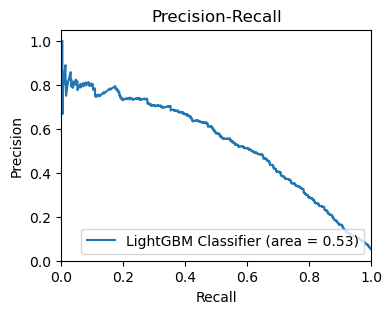

In [86]:
lgbmodel(X_train_fe, y_train.values.ravel(), X_val_fe, y_val.values.ravel(), X_test_fe, y_test.values.ravel(), "25th quantile")

In [87]:
#fea_imp_ = pd.DataFrame({'cols':X_train.columns, 'fea_imp':model.feature_importances_})
top_few_imp = fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)['cols'].unique()
X_train_imp = X_train[top_few_imp]
X_val_imp = X_val[top_few_imp]
X_test_imp = X_test[top_few_imp]

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=1.5 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14052
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features

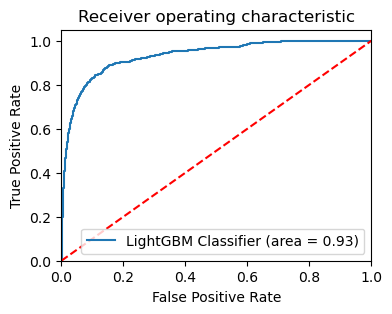

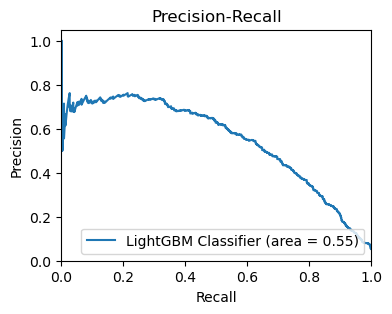

In [88]:
lgbmodel(X_train_imp, y_train.values.ravel(), X_val_imp, y_val.values.ravel(), X_test_imp, y_test.values.ravel(), "25th quantile")

### PCA

In [92]:
import pandas as pd
import numpy as np
import json
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer


In [93]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [94]:
pca.n_components_

26

In [95]:
X_train_pca = pd.DataFrame(pca.transform(X_train))
X_test_pca = pd.DataFrame(pca.transform(X_test))
X_val_pca = pd.DataFrame(pca.transform(X_val))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=3 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=3 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Number of positive: 5483, number of negative: 24923
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 30406, number of used features: 26


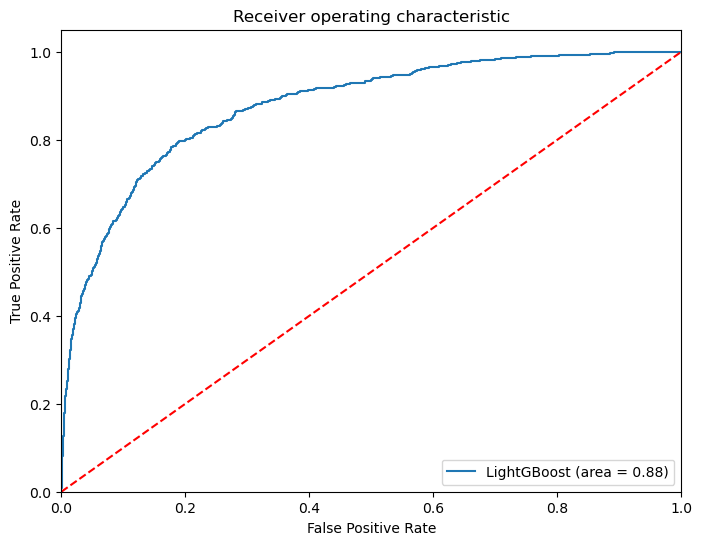

[1179  850  960  784  809  752 1033 1074  858  802  887  682  714  667
  689  711  678  744  640  690  662  700  754  805  740  739]


In [96]:
lgbmodel(X_train_pca, y_train.values.ravel(), X_val_pca, y_val.values.ravel(), X_test_pca, y_test.values.ravel(), "25th quantile")

# Exporting Datasets

In [20]:
%cd ../data/preprocessed_data

c:\Users\lowmi\OneDrive\Desktop\Uni\DSA4262\DSA4262-ACMXZ\data\preprocessed_data


In [21]:
df_all_features.to_parquet("df_all_features.parquet") # df containing all features, before splitting/encoding
df_train.to_parquet("df_train.parquet") # df containing all features, after splitting, before encoding
df_test.to_parquet("df_test.parquet") # df containing all features, after splitting, before encoding
df_val.to_parquet("df_val.parquet") # df containing all features, after splitting, before encoding
X_train.to_parquet("X_train.parquet") # df containing all features, after splitting, before encoding
y_train.to_parquet("y_train.parquet") # df containing all features, after splitting, before encoding
X_val.to_parquet("X_val.parquet") # df containing all features, after splitting, before encoding
y_val.to_parquet("y_val.parquet") # df containing all features, after splitting, before encoding
X_test.to_parquet("X_test.parquet") # df containing all features, after splitting, before encoding
y_test.to_parquet("y_test.parquet") # df containing all features, after splitting, before encoding
df_val_id.to_parquet("df_val_id.parquet") # df containing all features, after splitting, before encoding
X_train_enc.to_parquet("X_train_enc.parquet") # df containing all features, after encoding and oversampling
X_test_enc.to_parquet("X_test_enc.parquet") # df containing all features, after encoding and oversampling
X_val_enc.to_parquet("X_val_enc.parquet") # df containing all features, after encoding and oversampling
X_train_25.to_parquet("X_train_25.parquet")  # final df containing 25 percentile features for modelling
X_train_50.to_parquet("X_train_50.parquet") # final df containing 50 percentile features for modelling
X_train_75.to_parquet("X_train_75.parquet") # final df containing 75 percentile features for modelling
X_train_mean.to_parquet("X_train_mean.parquet") # final df containing mean features for modelling
